# Project:Covid_19_Worldwide Data Ananlysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
Dear community,

Hope you are well. In this area I want to clarify information about the dataset I used, some questions I posed to investigate it, and also communicate my results of the investigation. In this project, I will analyze the Covid_19__worldwide dataset to communicate useful results that help to explore important information that will help to find answers to our questions and maybe taking some decisions. Here I will mention a number of questions I posed to investigate the dataset and why some movies are successful and others are not. That depends on some metrics will discuss through our questions.

.........................................

.....................................................

1- Exploring the number of countries in each region ?

2- what are the countries that are with the highest population of fully vaccinated ?

3- What is the region with the highest % of population vaccinated ?

4- What are countries with the Highest social support ?

5- What are regions with the Highest social support ?

6- What are regions with the Highest Healthy life expectancy  ?

7- What are the regions with the Highest population vaccinated and fully vaccinated?

8- Does vaccination depend on social support  ?

9- what is the correlation between the GDP and Vaccination ?

10- what is the effect of  social support & healthy life expectancy on % of population vaccinated  ?

11- what is the vaccination influence on countries ?






**Firstly...... Importing some useful libiraries for our investigation.**

In [41]:
# Wrangling
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Cluster
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# Your clustering code here
# ...




## Data Wrangling
 
 **Secondly, I am going to load my dataset, assess it to check for any issues, and do cleaning operations to get clear and clean data for appropriate investigation.**

### General Properties

In [42]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
covid = pd.read_csv('Worldwide Vaccine Data.csv')
covid.head()


,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
0,Afghanistan,33,12526397,30.0,28.0
1,Albania,106,3025728,47.0,44.0
2,Algeria,35,15267442,18.0,15.0
3,Angola,74,23701049,47.0,26.0
4,Argentina,252,113272665,92.0,84.0


In [43]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
happiness = pd.read_csv('world-happiness-report-2021.csv')
happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


* checking data shape number of columns and rows that contain this data.

In [44]:
covid.shape

(187, 5)

In [45]:
happiness.shape

(149, 20)

* Doing some descriptive statistics.

In [46]:
covid.describe()

,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
count,187.000000,1.870000e+02,187.000000,187.000000
mean,141.930481,7.043970e+07,60.230481,55.014973
std,82.663396,3.093089e+08,25.209095,25.204906
min,0.000000,3.048000e+04,0.200000,0.200000
25%,70.500000,1.954755e+06,42.000000,34.500000
50%,142.000000,9.514267e+06,64.000000,57.000000
75%,207.500000,3.063100e+07,81.500000,76.000000
max,379.000000,3.488058e+09,99.000000,99.000000


In [47]:
happiness.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [48]:
#Checking some information about the dataset
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            187 non-null    object 
 1   Doses administered per 100 people  187 non-null    int64  
 2   Total doses administered           187 non-null    int64  
 3   % of population vaccinated         187 non-null    float64
 4   % of population fully vaccinated   187 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.4+ KB


In [49]:
#Checking some information about the dataset
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

There aren't any duplicates


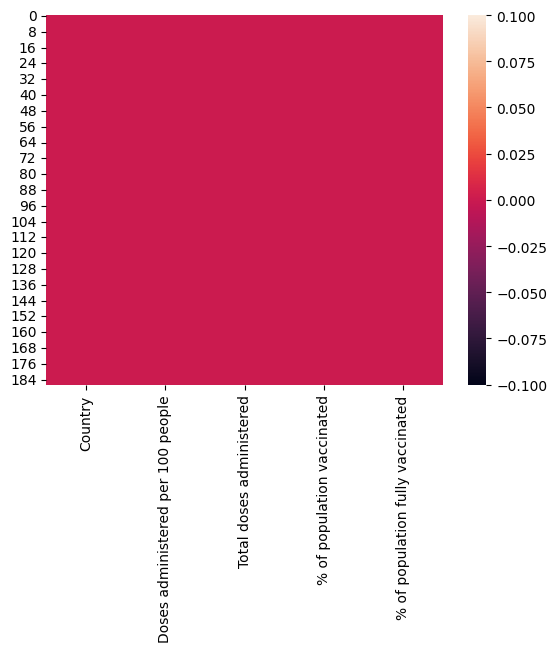

In [50]:
# Checking if there any Duplicates 

if covid.duplicated().any() == False:
    print("There aren't any duplicates")
else:
    print('There are suplicates')
    
sns.heatmap(covid.isnull())
plt.show()

In [51]:
#checking for na values
covid.isnull().sum()

Country                              0
Doses administered per 100 people    0
Total doses administered             0
% of population vaccinated           0
% of population fully vaccinated     0
dtype: int64

In [52]:
covid[covid['% of population fully vaccinated'].isnull()]

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated


In [53]:
#checking for na values
happiness.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

There aren't any duplicates


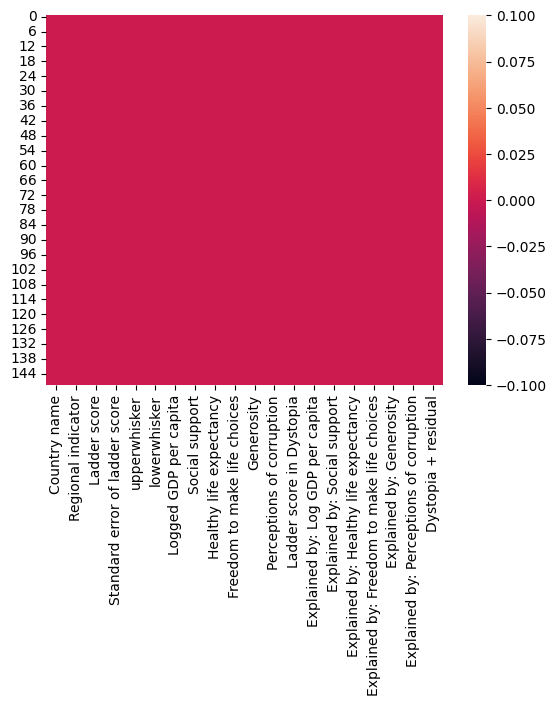

In [54]:
# Checking if there any Duplicates
if happiness.duplicated().any() == False:
    print("There aren't any duplicates")
else:
    print('There are suplicates')

# Nulls check
sns.heatmap(happiness.isnull())
plt.show()

* Checking for unique data and counting some data

In [55]:
covid.nunique()

Country                              187
Doses administered per 100 people    135
Total doses administered             187
% of population vaccinated            84
% of population fully vaccinated      79
dtype: int64

In [56]:
happiness.nunique()

Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142


# Data Cleaning


1- The are not any duplicted values.

2- There are not any missing values.

3- Dropping columns we do not need in our investigation.

4- Dropping zero values.

5- Sort values by Country column.

6- Merging the Two datasets.

7- Making Country column as index of our dataset.

In [57]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Checking for duplicated values after cleaning it
sum(covid.duplicated())


0

In [58]:
sum(happiness.duplicated())

0

### since we will take country column as our key, we will take a glance at  the countries column to check if there are similarities between the two datasets, andalso we tends to merge our datasets and filtering the importantantfeatures that will need in our statistics and analysis

In [59]:
# Sorting Values by country
print(covid.sort_values(by=["Country"])["Country"].values, '\n', len(covid.sort_values(by=["Country"])["Country"]))



['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominican Rep.' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati' 'Kosovo' 'Kuwait' 'Kyrgyzstan'
 'Laos' 'Latvi

In [60]:
# Sorting values by the country name.
print(happiness.sort_values(by=['Country name'])['Country name'].values, '\n', len(happiness.sort_values(by=['Country name'])['Country name']))


['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Benin'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea'
 'Haiti' 'Honduras' 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo'
 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Libya' 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia'
 'Maldives' 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Moldova'
 'Mongolia' 'Montenegro' '

In [61]:
# Locating values
display(covid[covid['Country']=='U.K.'])
covid.loc[6,'Country'] = 'United Kingdom'

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
174,U.K.,226,151248820,81.0,76.0


In [62]:
# Merging the Tow Datasets and Sort values by the Country Column
df = covid.merge(happiness, left_on='Country', right_on='Country name', how='inner')
del df['Country name']

df = df.sort_values(by=['Country'])
df

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,33,12526397,30.0,28.0,South Asia,2.523,0.038,2.596,2.449,...,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
1,Albania,106,3025728,47.0,44.0,Central and Eastern Europe,5.117,0.059,5.234,5.001,...,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
2,Algeria,35,15267442,18.0,15.0,Middle East and North Africa,4.887,0.053,4.991,4.783,...,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
3,Argentina,252,113272665,92.0,84.0,Latin America and Caribbean,5.929,0.056,6.040,5.819,...,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
4,Armenia,73,2150112,38.0,33.0,Commonwealth of Independent States,5.283,0.058,5.397,5.168,...,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,133,37860994,78.0,52.0,Latin America and Caribbean,4.892,0.064,5.017,4.767,...,-0.169,0.827,2.43,0.852,0.897,0.574,0.284,0.078,0.072,2.135
136,Vietnam,275,265336568,94.0,89.0,Southeast Asia,5.411,0.039,5.488,5.334,...,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
137,Yemen,4,1242982,3.5,2.6,Middle East and North Africa,3.658,0.070,3.794,3.521,...,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
138,Zambia,71,12655676,60.0,48.0,Sub-Saharan Africa,4.073,0.069,4.209,3.938,...,0.061,0.823,2.43,0.528,0.552,0.231,0.487,0.227,0.074,1.975


# Descriptive Analysis

**Since we have 24 features, we will first start selecting the variables that we are going to use.
The correlation matrix will help us find the the most relevant features.
I will also select some variables that i find interesting for the analysis.
Important to remark that the chosen criteria of the variables will be the relationship they have with the feature'% of population vaccinated', since our analysis is based on that.**

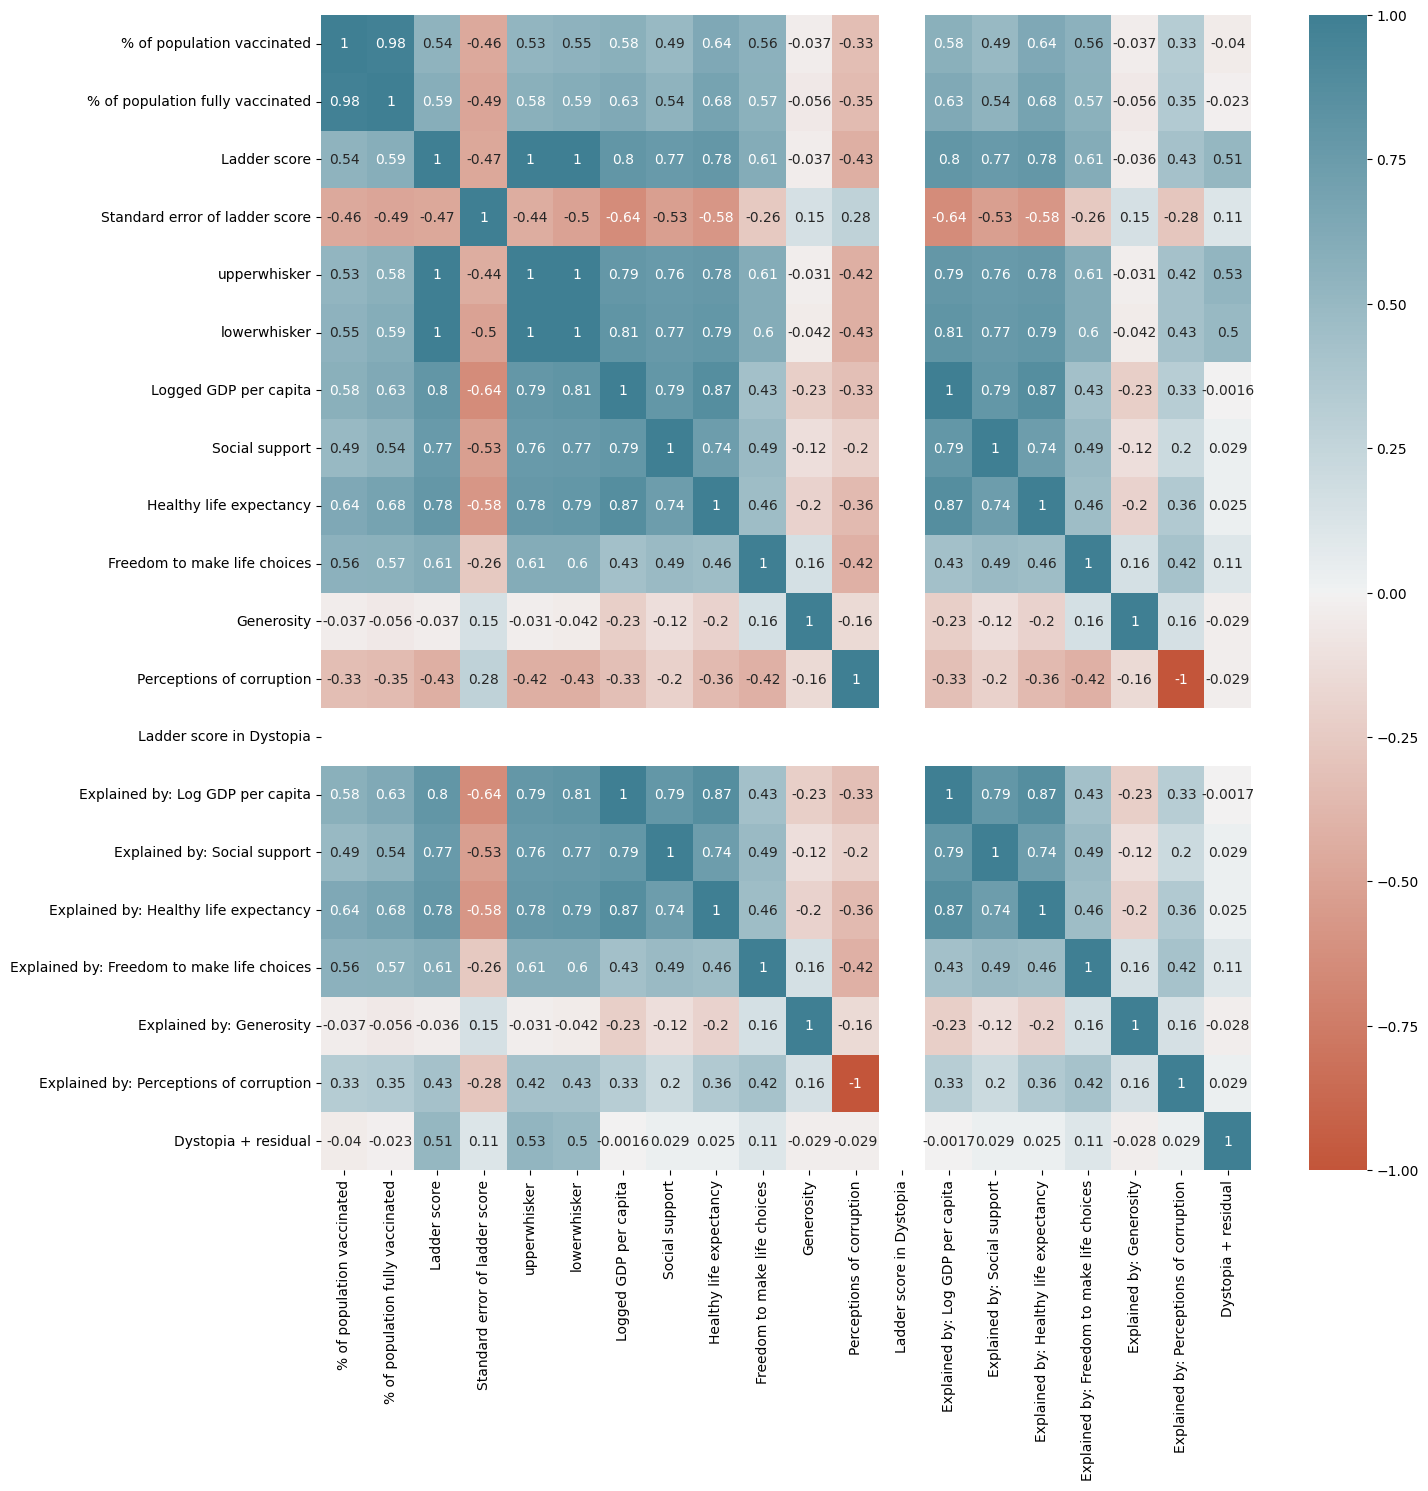

In [63]:
fig, ax = plt.subplots(figsize=(15,15))
nums = list(df.select_dtypes('float64').columns)

sns.heatmap(df[nums].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

plt.show()

In [64]:
# the chosen features are the wollowing
features = ['Country','Regional indicator', '% of population vaccinated', '% of population fully vaccinated', 
            'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']

In [65]:
df = df[features]
df

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
0,Afghanistan,South Asia,30.0,28.0,2.523,7.695,0.463,52.493
1,Albania,Central and Eastern Europe,47.0,44.0,5.117,9.520,0.697,68.999
2,Algeria,Middle East and North Africa,18.0,15.0,4.887,9.342,0.802,66.005
3,Argentina,Latin America and Caribbean,92.0,84.0,5.929,9.962,0.898,69.000
4,Armenia,Commonwealth of Independent States,38.0,33.0,5.283,9.487,0.799,67.055
...,...,...,...,...,...,...,...,...
135,Venezuela,Latin America and Caribbean,78.0,52.0,4.892,9.073,0.861,66.700
136,Vietnam,Southeast Asia,94.0,89.0,5.411,8.973,0.850,68.034
137,Yemen,Middle East and North Africa,3.5,2.6,3.658,7.578,0.832,57.122
138,Zambia,Sub-Saharan Africa,60.0,48.0,4.073,8.145,0.708,55.809


In [66]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           140 non-null    object 
 1   Regional indicator                140 non-null    object 
 2   % of population vaccinated        140 non-null    float64
 3   % of population fully vaccinated  140 non-null    float64
 4   Ladder score                      140 non-null    float64
 5   Logged GDP per capita             140 non-null    float64
 6   Social support                    140 non-null    float64
 7   Healthy life expectancy           140 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.8+ KB


None

     * Categorization of our features.
        Since we hude number of countries, and each one is unique.
        So we can examine our categorical variables as we distributed to regions(categorical variable).

In [67]:
df[list(df.select_dtypes('object').columns)]

,Country,Regional indicator
0,Afghanistan,South Asia
1,Albania,Central and Eastern Europe
2,Algeria,Middle East and North Africa
3,Argentina,Latin America and Caribbean
4,Armenia,Commonwealth of Independent States
...,...,...
135,Venezuela,Latin America and Caribbean
136,Vietnam,Southeast Asia
137,Yemen,Middle East and North Africa
138,Zambia,Sub-Saharan Africa


## Exploratory Data Analysis

* Now, I am going to visualising my Data
### Research Question 1 (Exploring the number of the countries in each region?)

In [68]:
fig = px.histogram(df, x='Regional indicator', template="plotly_white", color_discrete_sequence=["rgb(127,232,186)"]).update_xaxes(categoryorder="total descending")
fig.show()

print(df['Regional indicator'].value_counts())

Regional indicator
Sub-Saharan Africa                    34
Western Europe                        20
Latin America and Caribbean           19
Central and Eastern Europe            17
Middle East and North Africa          15
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
North America and ANZ                  4
East Asia                              3
Name: count, dtype: int64


### Research Question 2 (what are countries that are with the highest population of fully vaccinated?)

In [69]:
# Visualization
figure = px.bar(df, y='% of population fully vaccinated', x='Country',
            title="Countries with Highest population fully vaccinated")
figure.show()

 
 **we can  see that the countries with the highest population vaccinated:**

  
    1- chile.
    2- Mauritania.
    3- New Zealand.
    4- Venezuela.
   
   
 **for the lowest vaccinated:**
 
    1-Zambia.
    2- Honduras.
    3- Madagascar.
    4- Serbia.

### Visualizing our variables

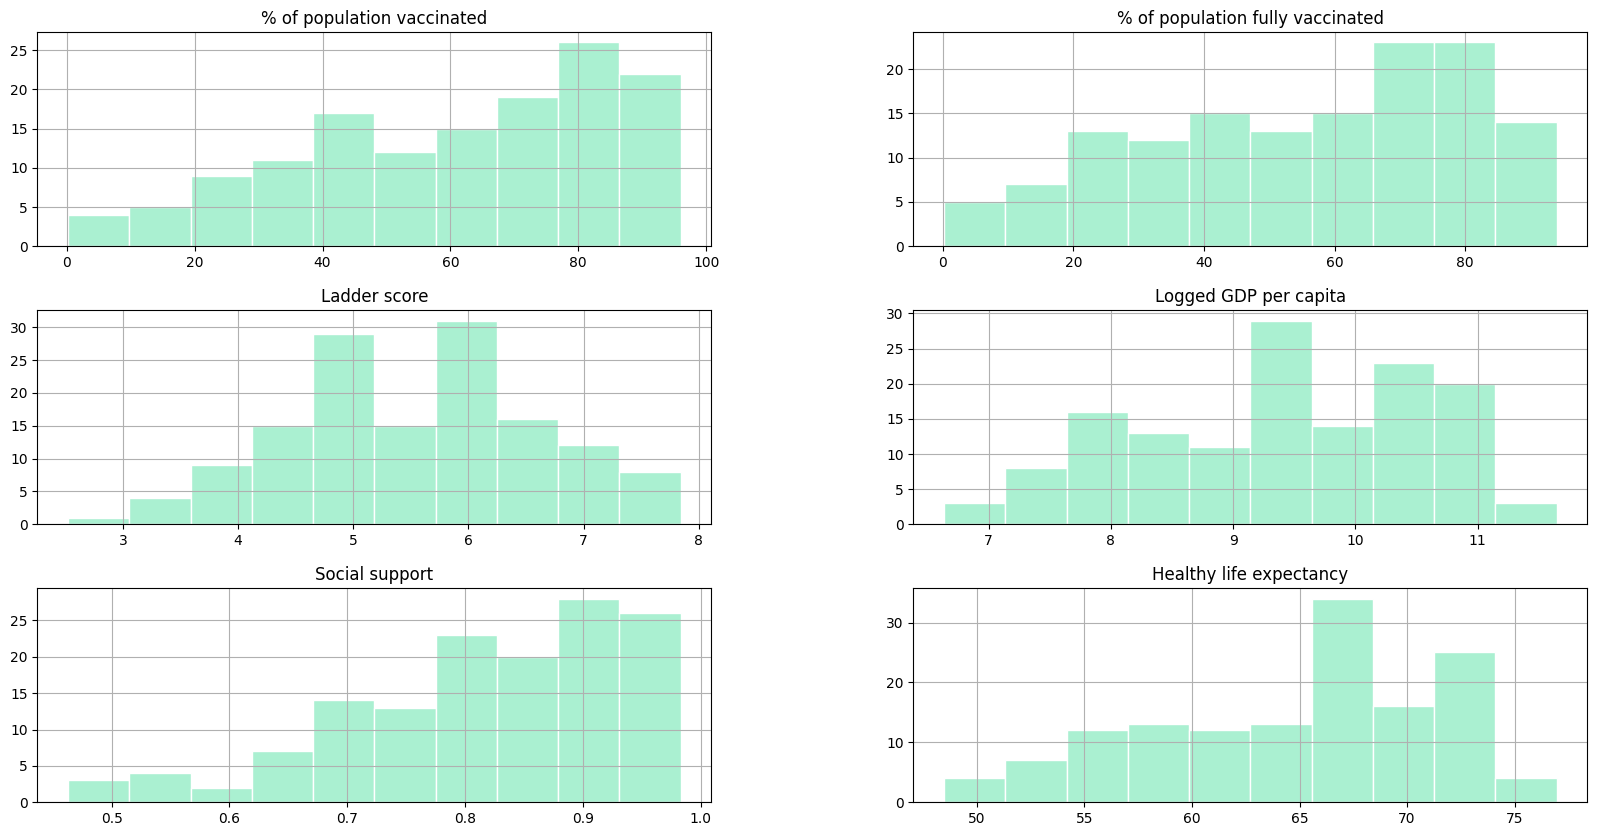

,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,60.756429,55.639286,5.537029,9.405179,0.815021,64.923407
std,24.521889,24.479058,1.092539,1.160011,0.117213,6.702571
min,0.200000,0.200000,2.523000,6.635000,0.463000,48.478000
25%,42.750000,34.750000,4.847500,8.540250,0.745500,59.677750
50%,65.000000,61.000000,5.557500,9.538500,0.832000,66.602000
75%,81.250000,76.000000,6.268500,10.372250,0.908500,69.534250
max,96.000000,94.000000,7.842000,11.647000,0.983000,76.953000


In [70]:
numbers = list(df.select_dtypes('float64').columns)

df[numbers].hist(figsize=(20,10), color='#aaf0d1', edgecolor='white')

plt.show()

df[numbers].describe()

   **We can see that from our visualzation:**
   
           1- The perscentage of the vaccinated are higher than fully vaccinated /    
   **if we compared our chart of the twos;**
      
           1-  we find that about 10% of the countries are not fully vaccinated, and that means most of the countries
               are still in the first phase of the vaccination.
               

### Research Question 3 (What is the region with the highest  % of population vaccinated ?)

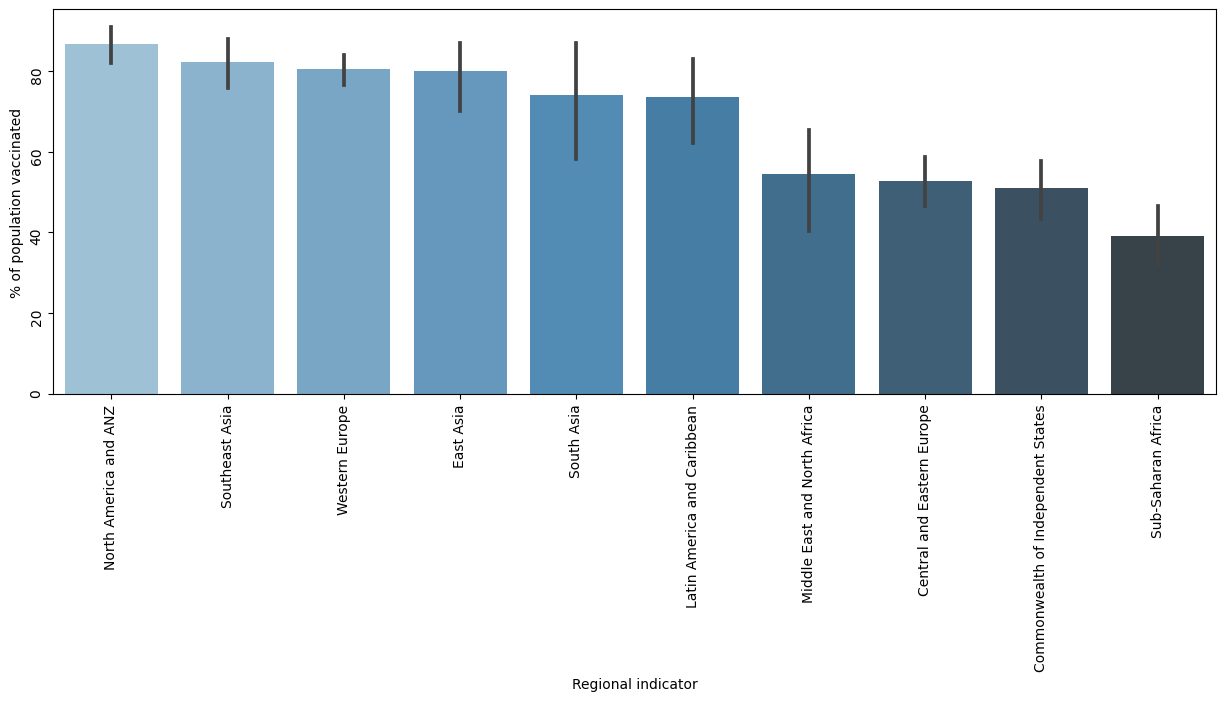

Regional indicator
North America and ANZ                 86.750000
Southeast Asia                        82.222222
Western Europe                        80.400000
East Asia                             80.000000
South Asia                            74.000000
Latin America and Caribbean           73.505263
Middle East and North Africa          54.433333
Central and Eastern Europe            52.647059
Commonwealth of Independent States    50.916667
Sub-Saharan Africa                    39.229412
Name: % of population vaccinated, dtype: float64


In [71]:
fig, ax = plt.subplots(figsize=(15,5))

order=list(df.groupby('Regional indicator')['% of population vaccinated'].mean().sort_values(ascending=False).index)
sns.barplot(x='Regional indicator', y='% of population vaccinated', data=df, order=order, palette="Blues_d")

ax.tick_params(labelrotation=90)

plt.show()

print(df.groupby('Regional indicator')['% of population vaccinated'].mean().sort_values(ascending=False))

 **We can from the graph: the two regions with highest vaccination**
 
      1- North America and ANZ.
      2- Southeast Asia.
 **The lowest region in vaccination**
 
     1- Sub-Saharan Africa.

In [72]:
#Exploring some information about North America and ANZ
df[df['Regional indicator']=='North America and ANZ']

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
6,Australia,North America and ANZ,88.0,85.0,7.183,10.796,0.940,73.9
23,Canada,North America and ANZ,92.0,84.0,7.103,10.776,0.926,73.8
94,New Zealand,North America and ANZ,87.0,84.0,7.277,10.643,0.948,73.4
132,United States,North America and ANZ,80.0,68.0,6.951,11.023,0.920,68.2


### Research Question 4 (What are countries with the Highest social support?)

In [73]:
figure = px.bar(df, y='Social support', x='Country',
            title="Countries with Highest Social support")
figure.show()

**We illustrate about the social support in the countries:**

  **The highest**
  
      1- Iceland.
      2- Turkmenistan.
      3- Kazakhistan.
      
  **The lowest**
 
       1- Afghnistan.
       2- Burundi.
       3- Benin.
       
       

### Research Question 5 (What are regions with the Highest social support?)

In [74]:
figure = px.bar(df, y='Social support', x='Regional indicator',
            title="Regions with Highest Social support")
figure.show()

**From the chart we can see that the highest 3 regions with in social support :** 
            
            1- Sub-Saharan Africa
            2- Western Europe
            3- Latin America and Cribbbean

### Research Question 6 (What are regions with the Highest Healthy life expectancy?)

In [75]:
figure = px.bar(df, y='Healthy life expectancy', x='Regional indicator',
            title="Regions with Highest Healthy life expectancy")
figure.show()

**From the chart we can see that the highest 3 regions with in Healthy life expectancy :** 
            
            1- Sub-Saharan Africa
            2- Western Europe
            3- Latin America and Cribbbean

### Research Question 7 (What are the regions with the Highest population vaccinated and fully vaccinated?)

In [76]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df["Regional indicator"],
    y=df["% of population vaccinated"],
    name='Vaccinated',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=df["Regional indicator"],
    y=df["% of population fully vaccinated"],
    name='Fully Vaccinated',
    marker_color='lightsalmon'
))
fig.update_layout(barmode='group', xaxis_tickangle=-120)
fig.show()

**From the chart we can see that the highest 3 regions with in vaccinated :** 
            
            1- Western Europe
            2- Latin America and Cribbbean
            3- Sub-Saharan Africa
            
            

### Research Question 8 (Does vaccination depend on social support ?)

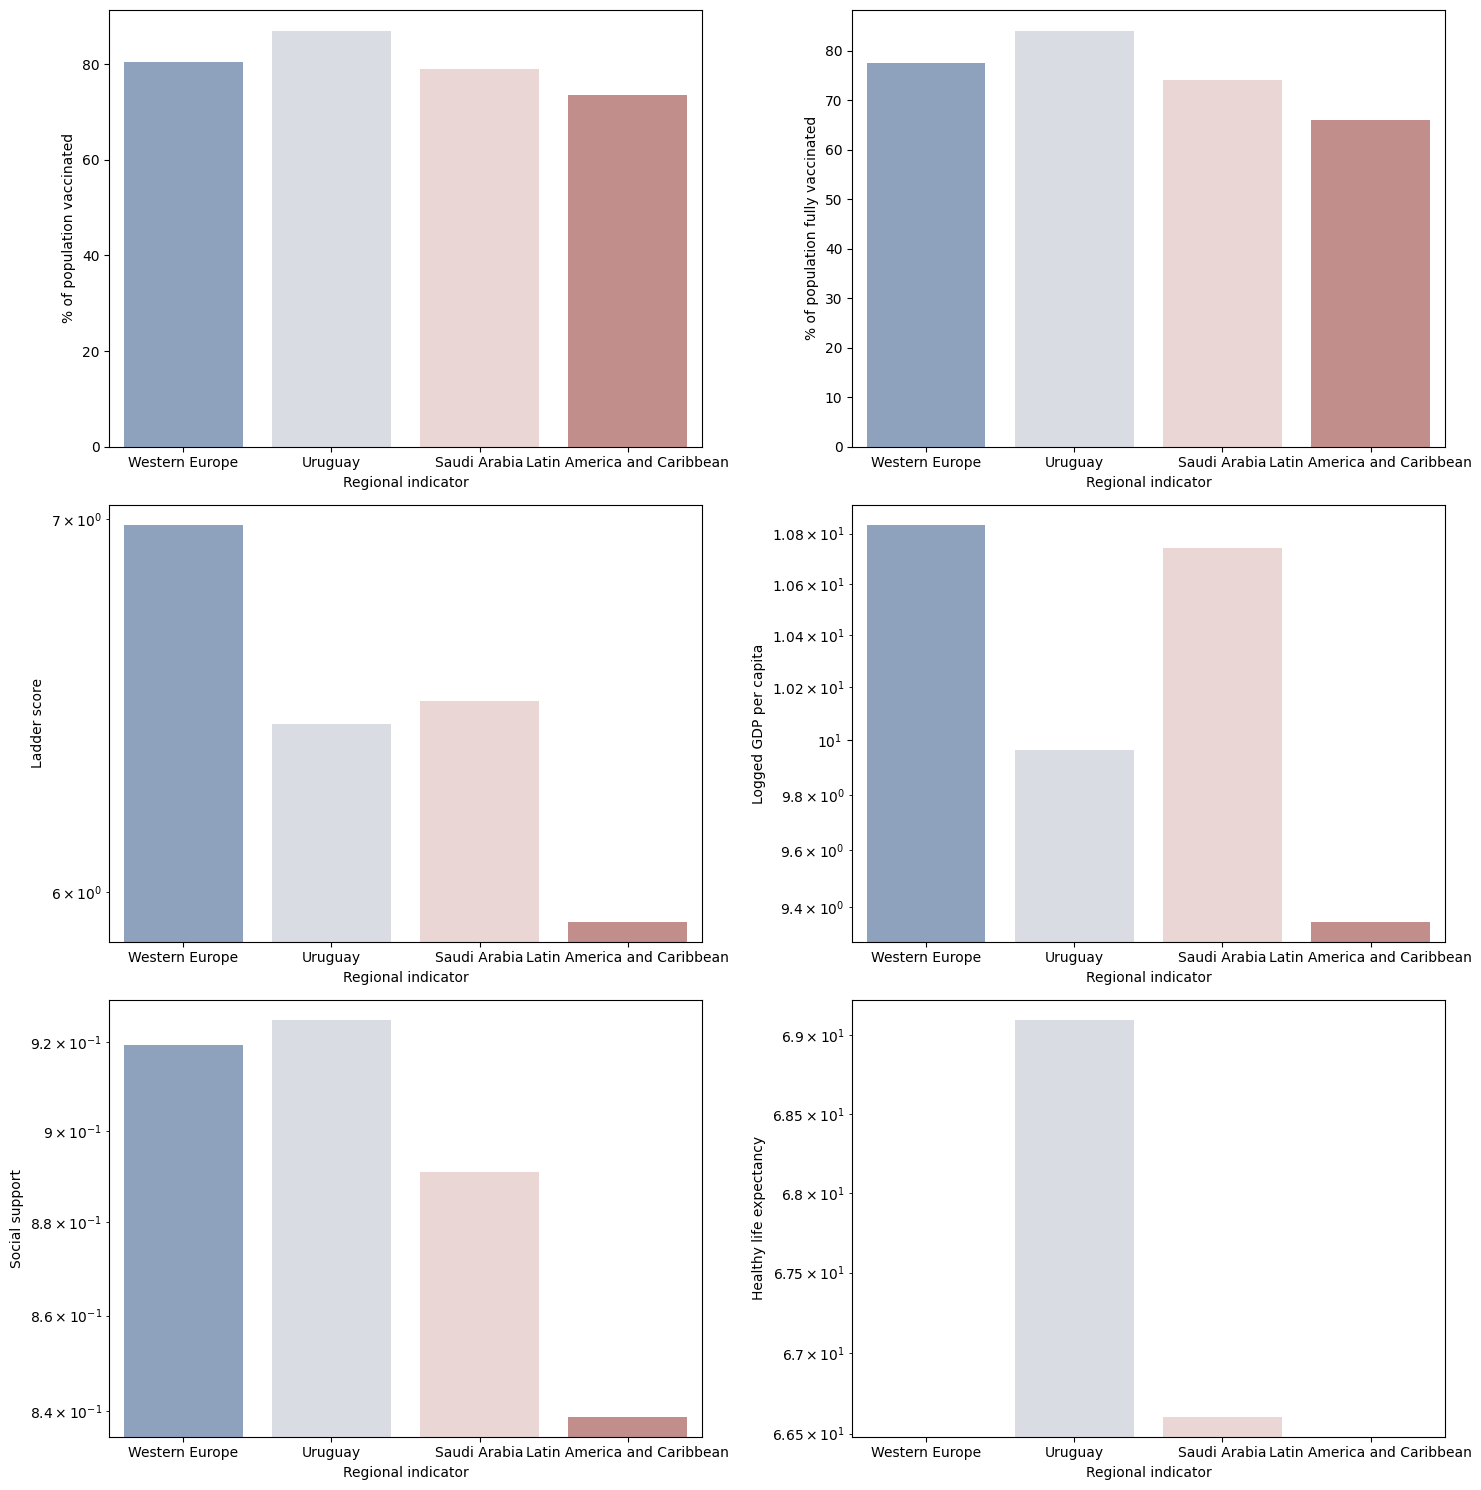

,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
0,Western Europe,80.400000,77.550000,6.983850,10.835050,0.919200,NaN
133,Uruguay,87.000000,84.000000,6.431000,9.966000,0.925000,69.100
110,Saudi Arabia,79.000000,74.000000,6.494000,10.743000,0.891000,66.603
0,Latin America and Caribbean,73.505263,65.952632,5.927158,9.347263,0.838789,NaN


In [77]:
# Filter for Western Europe
europe = df['Regional indicator'] == "Western Europe"
europe2 = df[europe]
europe2 = europe2.groupby('Regional indicator')[list(europe2.columns[2:-1])].mean().reset_index()

# Filter for Latin America and Caribbean
latin = df['Regional indicator'] == "Latin America and Caribbean"
latin2 = df[latin]
latin2 = latin2.groupby('Regional indicator')[list(latin2.columns[2:-1])].mean().reset_index()

# Filter for Uruguay
uruguay = df['Country'] == "Uruguay"
uruguay2 = df[uruguay].copy()
del uruguay2['Regional indicator']
uruguay2 = uruguay2.rename(columns={'Country':'Regional indicator'})

# Filter for Saudi Arabia
saudi = df['Country'] == "Saudi Arabia"
saudi2 = df[saudi].copy()
del saudi2['Regional indicator']
saudi2 = saudi2.rename(columns={'Country':'Regional indicator'})

# Concatenate the filtered dataframes
special = pd.concat([europe2, uruguay2, saudi2, latin2], axis=0)

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# Plotting
sns.barplot(x='Regional indicator', y='% of population vaccinated', data=special, ax=ax[0, 0], palette="vlag")
sns.barplot(x='Regional indicator', y='% of population fully vaccinated', data=special, ax=ax[0, 1], palette="vlag")
sns.barplot(x='Regional indicator', y='Ladder score', data=special, ax=ax[1, 0], palette="vlag")
ax[1, 0].set_yscale("log")
sns.barplot(x='Regional indicator', y='Logged GDP per capita', data=special, ax=ax[1, 1], palette="vlag")
ax[1, 1].set_yscale("log")
sns.barplot(x='Regional indicator', y='Social support', data=special, ax=ax[2, 0], palette="vlag")
ax[2, 0].set_yscale("log")
sns.barplot(x='Regional indicator', y='Healthy life expectancy', data=special, ax=ax[2, 1], palette="vlag")
ax[2, 1].set_yscale("log")

# Show the plot
plt.tight_layout()
plt.show()

# Display the concatenated dataframe
display(special)

**Our results show that ;**
      
      1- Uragay is the highest one in vaccination through the two phases. Also, it records the highest social support.
         that takes us to the question " Is Uraguay ranked 1 because of the social support ?"
         Answer: yes, it records 0.93 and ranked 1 in social support.
      2- Western Europe ranked 2 in vaccination. Also, it ranked 2 after Uraguay in social support.
      3- Saudi Arabia ranked 3  in vaccination. Also, it ranked 3 after Uraguay in social support.
      4- There is something special about Uruguay & Sudia Arabia, They have healthy life expectancy.
          since Sudia Arabia ranked 3 but only the difference of about 0.03 form Uruguay that ranked 1.
    That is because of the importance they give to the social support that leads to an increase in the awareness 
          towards the vaccination.

### Research Question 9 (what is the correlation between the GDP and Vaccination?)

In [81]:
# Cluster
X = df['Logged GDP per capita'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, n_init=3, init="random", random_state=42)
kmeans.fit(X)

df.loc[:, 'GDP_Cluster'] = kmeans.labels_.astype(str)
df.loc[:, 'GDP_Cluster'] = df['GDP_Cluster'].map({'0': 'Low GDP', '1': 'High GDP', '2': 'Medium GDP'})

# Viz


fig = px.scatter(
    data_frame=df,
    x='Logged GDP per capita',
    y='% of population vaccinated',
    color='GDP_Cluster',
    template="plotly_white",
    hover_name='Country',
    hover_data=['Regional indicator', '% of population vaccinated', 'Logged GDP per capita', 'Social support']
)

fig.show()

gdp = df.groupby('GDP_Cluster')['% of population vaccinated'].mean().sort_values()
gdp = pd.DataFrame(gdp, columns=['average % of population vaccinated'])
display(gdp)

,average % of population vaccinated


  **We can see from the graph that:**
                
                1- We can see that GDP affect on the percentage of population vaccinated: 
                            "the highest of the GDP, the highest of the people vaccinated"
                2- We can see that there is one high GDP country with low vaccinated population (Romania).
                3- We can see that medium GDPs countries with high vaccinated population (
                                                                                           1- Vietnam.
                                                                                            2- Peru.         )
            And that is because poor level of cooperation between countries’ region .
                       may also, because of the poor management.



### Research Question 10 (what is the effect of  social support & healthy life expectancy on % of population vaccinated ?)

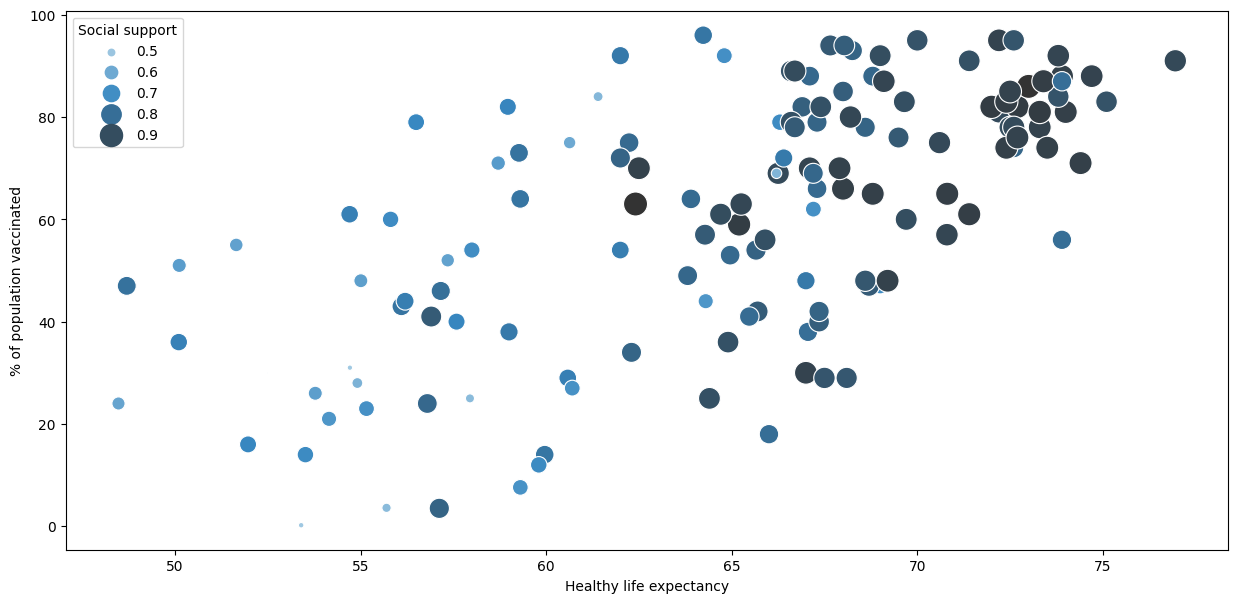

In [79]:
fig, ax = plt.subplots(figsize=(15,7))

sns.scatterplot(x='Healthy life expectancy', y='% of population vaccinated', data=df, 
                hue='Social support',palette="Blues_d", 
                size='Social support', sizes=(0.3, 300))

plt.show()

**The tells us that:** 

        There is a positive relationship between % of populatio vaccinated and social support and heathy life expectancy.

### Research Question 11 (what is the vaccination influence on countries ?)

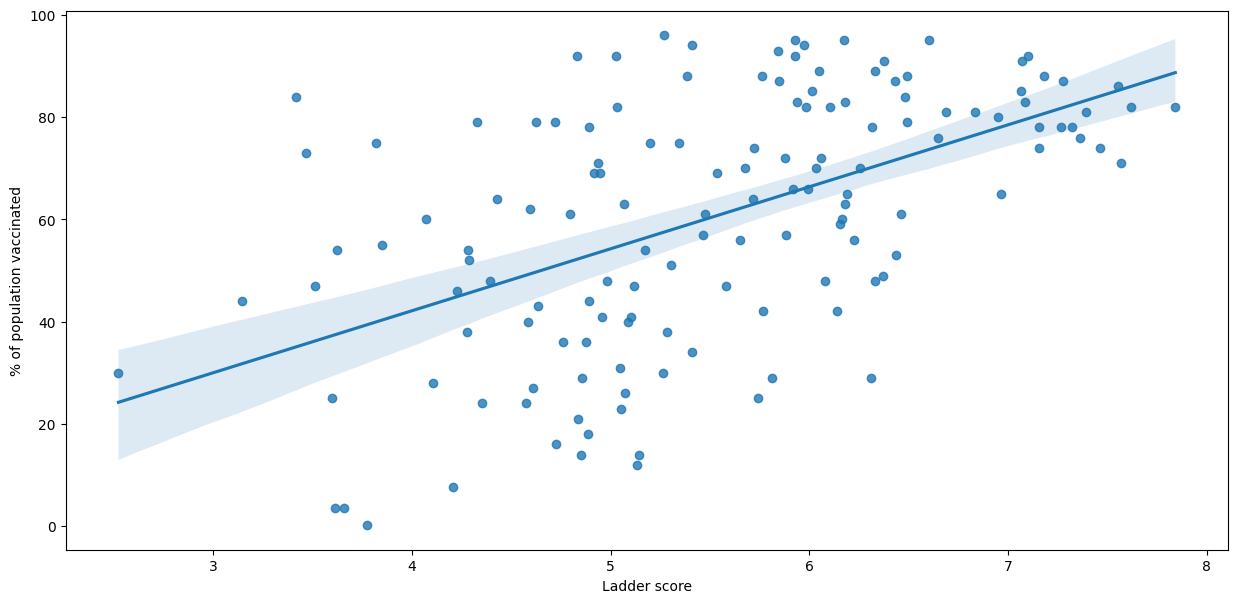

In [80]:
fig, ax = plt.subplots(figsize=(15,7))
sns.regplot(x="Ladder score", y="% of population vaccinated", data=df)

plt.show()

**The tells us that:** 
       
       while the ladder score is increasing, population vaccinated increase. the more satisfication.

## The Results
  
     We notice that
       1- countries especially in the same region, not in the same phase of vaccination.
       2- Social support has an effect on the vaccination rate in regions and countries in one region.
       3- the more ladder score the more satisfied region.
       4- The higher GPD, the highest vaccinated one.
       5 The highest region in vaccination tells us that this region has good relationships and communication between  its                 countries. And also, has a justified distribution of its resources between its countries. 
       

## Our Recommendation
      
      For a better life for the populations and more advanced countries & regions:
         1- strengthen the relationships and cooperation between countries, especially in the same region.
         2- Justified distribution support between the countries.
         3- Achieving equality as much as they can.
         
        As a result of that, it will outcomes a highly vaccinated population  &  healthy communities. 